In [21]:
%load_ext autoreload
%autoreload 2
from eden.util import configure_logging
import logging
configure_logging(logging.getLogger(),verbosity=2)
%matplotlib inline
!pwd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/ikea/GraphLearn/example/Abstract


In [22]:
# get data
from itertools import islice
'''
Create a function that is able to deliver a graph iterator
'''
from eden.converter.fasta import fasta_to_sequence
from eden.converter.rna.rnafold import rnafold_to_eden

from eden.graph import Vectorizer
def rfam_uri(family_id):
    return 'http://rfam.xfam.org/family/%s/alignment?acc=%s&format=fastau&download=0'%(family_id,family_id)


def clean(graphs):
    for g in graphs:
        for n,d in g.nodes(data=True):
            if 'weight' in d:
                d.pop('weight')
        yield g


def rfam_uri(family_id):
    return '%s.fa'%(family_id)

def get_graphs(rfam_id = '../toolsdata/RF00005',size=9999):
    seqs = fasta_to_sequence(rfam_uri(rfam_id))
    graphs = islice( clean(rnafold_to_eden(seqs, shape_type=5, energy_range=30, max_num=3)), size)
    return graphs


from eden.converter.fasta import fasta_to_sequence
import itertools


def get_sequences(size=9999):
    sequences = itertools.islice( fasta_to_sequence("../toolsdata/RF00005.fa"), size)
    return [ b for (a,b) in sequences ]

def get_sequences_with_names(size=9999):
    sequences = itertools.islice( fasta_to_sequence("../toolsdata/RF00005.fa"), size)
    return sequences


#dataset_names = !cat NCI60/names
#dataset = dataset_names[4]
#dataset_fname = 'NCI60/' + dataset + '_orig_pos.gspan'
#print 'Working with dataset: %s' % dataset 


In [23]:
'''DEBUGGING PREPROCESSA'''

from graphlearn.utils import draw
import graphlearn.abstract_graphs.learned_RNA as learned
from eden.graph import Vectorizer
if False:
    # if we are not interested in what the pp does we can skip this because it is slow
    # it shows how the created abstractions look like.
    v=Vectorizer(triangular_decomposition=False,complexity=3)
    pp=learned.RnaPreProcessor(kmeans_clusters=3,structure_mod=False)
    pp.set_param(v)
    gm=pp.fit_transform(get_sequences_with_names(40))

    for i in range(10):
        draw.graphlearn([gm[i+5].graph(),gm[i+5].base_graph(),gm[i+5].abstract_graph()],size=13,contract=True, abstract_color='red')



In [24]:
import eden.RNA
eden.RNA.Vectorizer()

In [25]:
%%time
'''
learning a grammar
'''
import graphlearn.abstract_graphs.learned_RNA as learned
import graphlearn.abstract_graphs.RNA as rna
from graphlearn import feasibility
feas=feasibility.FeasibilityChecker(checklist=[feasibility.default_check,rna.is_rna])

graphs = get_sequences_with_names(50)
pp=learned.RnaPreProcessor(base_thickness_list=[2],kmeans_clusters=3,structure_mod=False)
sampler=rna.AbstractSampler(radius_list=[0,1],thickness_list=[1], min_cip_count=2, min_interface_count=2,feasibility_checker=feas, preprocessor=pp)
sampler.fit(graphs,grammar_n_jobs=4,grammar_batch_size=1)
sampler.save('../tmp/rna_annotate.ge')

fitting nn done
fitting was asked with n=1

Classifier:
SGDClassifier(alpha=0.000972721508673, average=False, class_weight=None,
       epsilon=0.1, eta0=0.692656544298, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='log', n_iter=15, n_jobs=1,
       penalty='elasticnet', power_t=0.533598776534, random_state=None,
       shuffle=True, verbose=0, warm_start=False)

Predictive performance:
            accuracy: 1.000 +- 0.000
           precision: 1.000 +- 0.000
              recall: 1.000 +- 0.000
                  f1: 1.000 +- 0.000
   average_precision: 1.000 +- 0.000
             roc_auc: 1.000 +- 0.000
fit pp done
#instances: 50  #interfaces: 42   #cores: 61   #core-interface-pairs: 177
Saved model: ../tmp/rna_annotate.ge
CPU times: user 19.5 s, sys: 12.7 s, total: 32.2 s
Wall time: 54.8 s


interface id: 383376 [11 options]


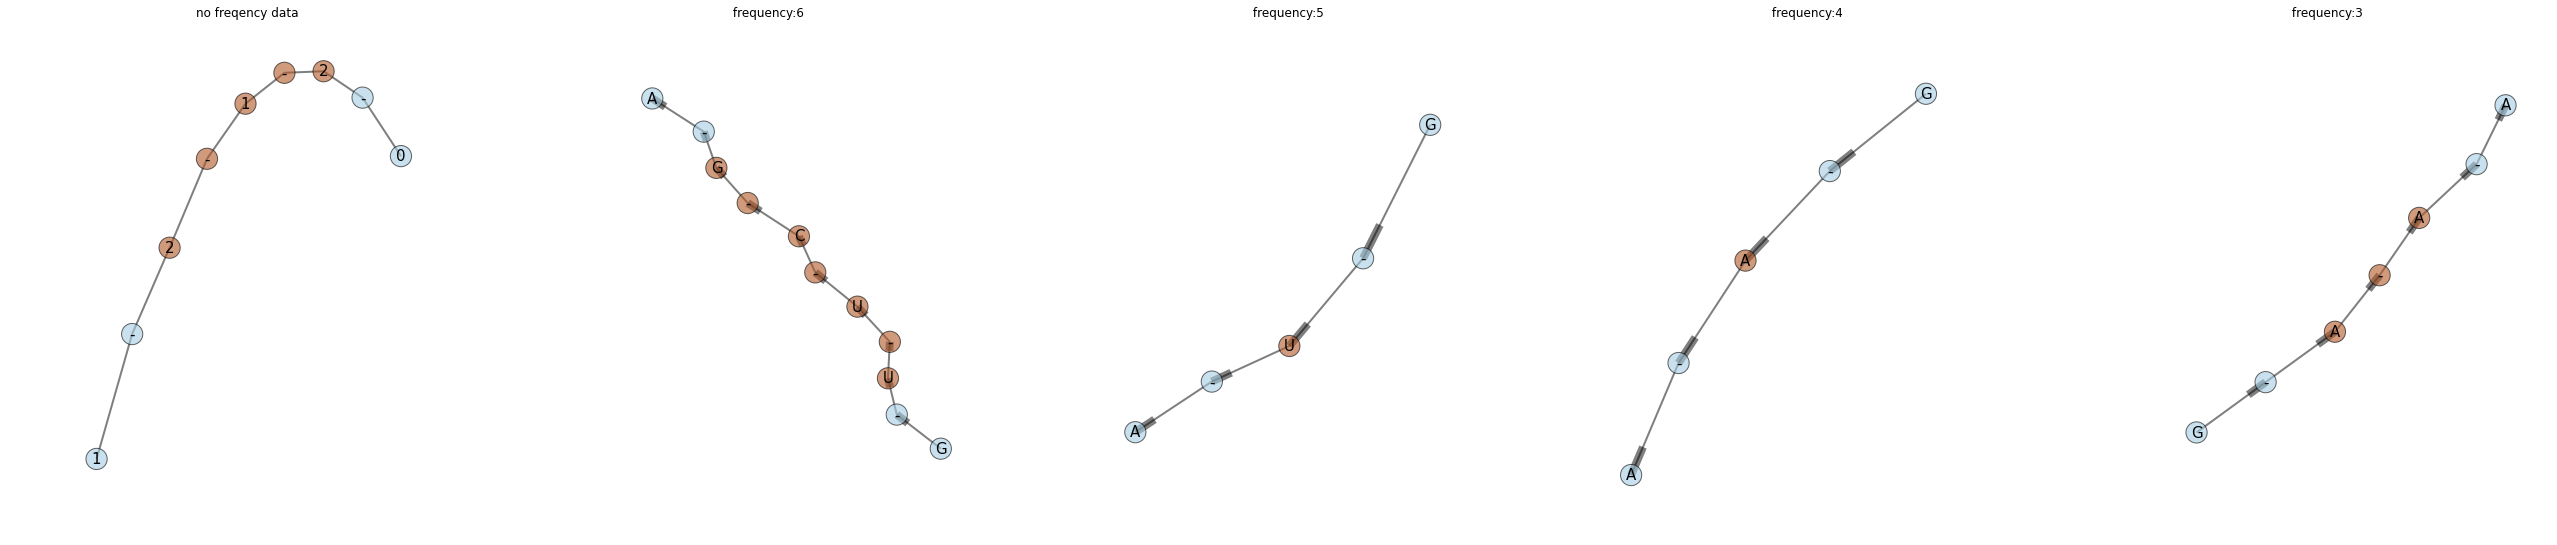

interface id: 87100 [10 options]


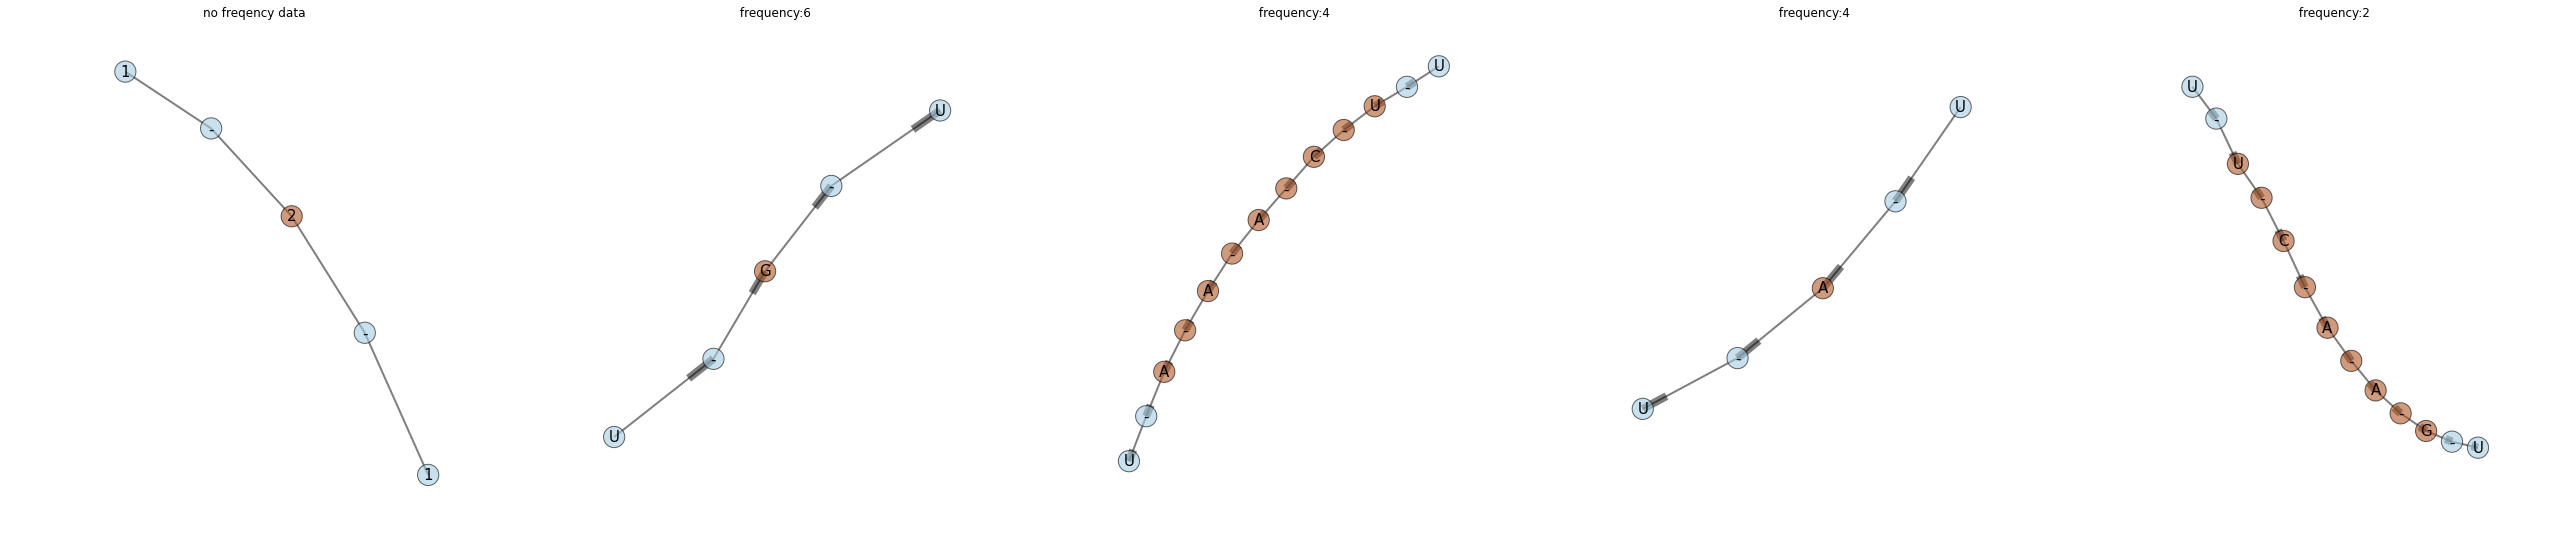

interface id: 799300 [9 options]


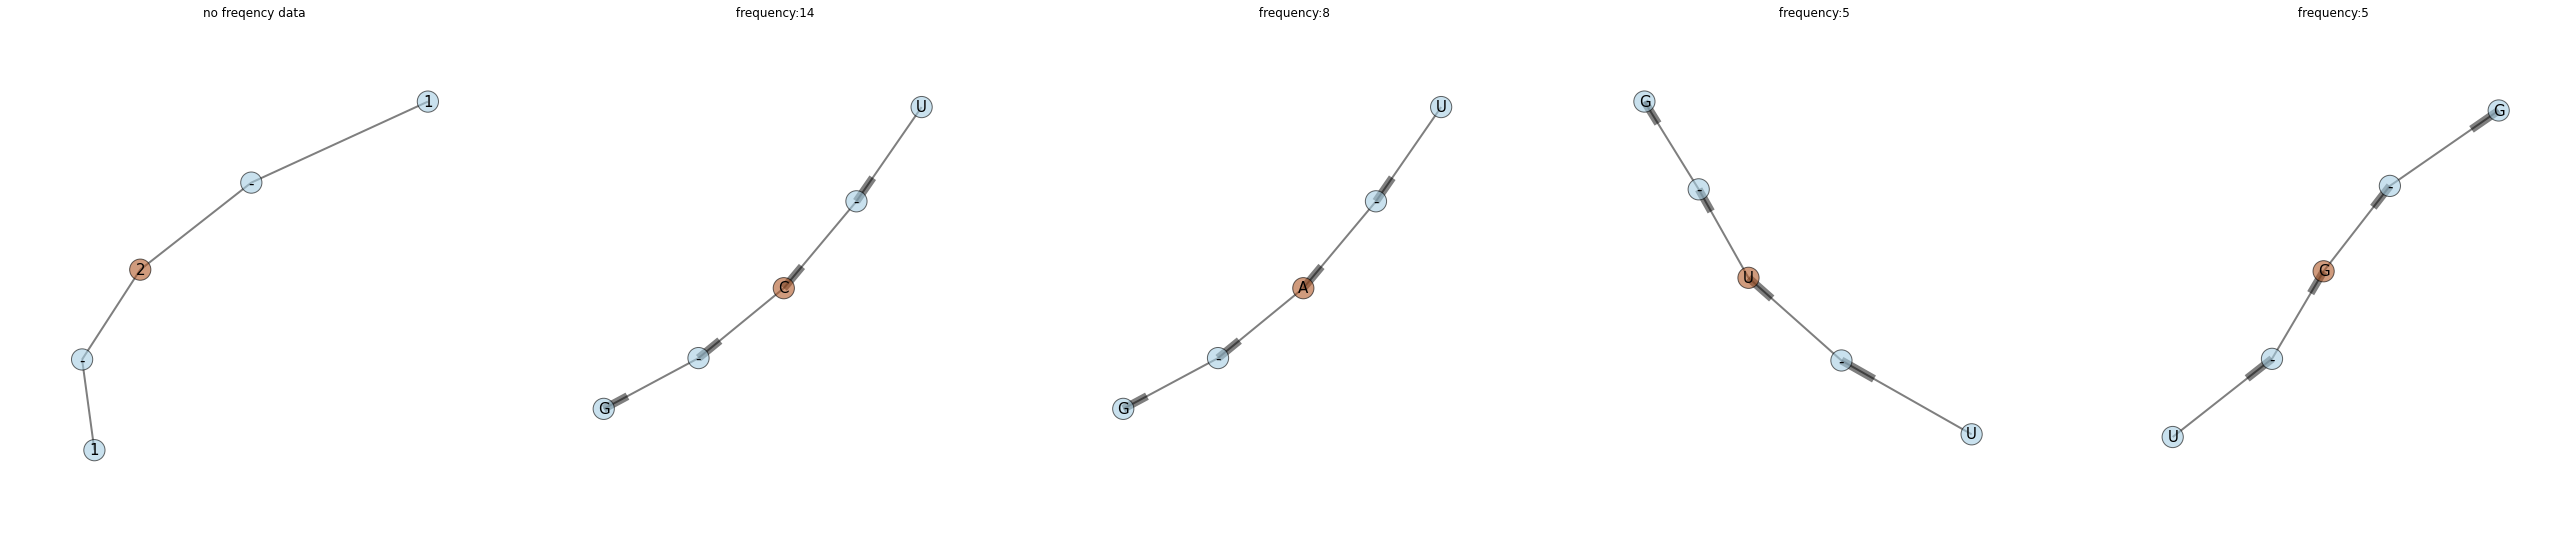

interface id: 1008252 [8 options]


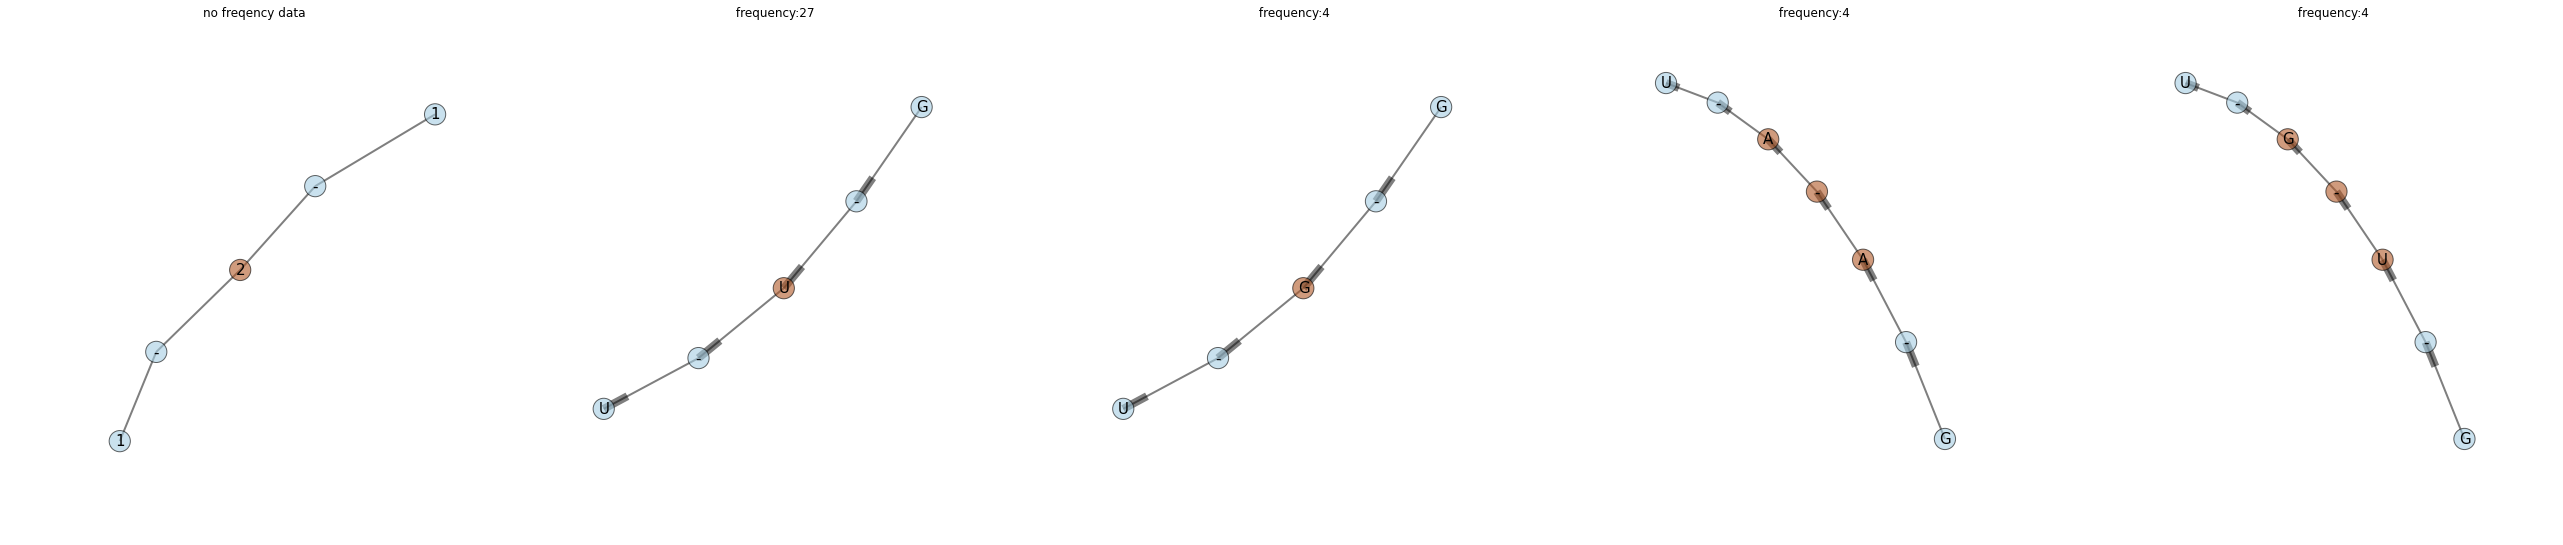

interface id: 618564 [8 options]


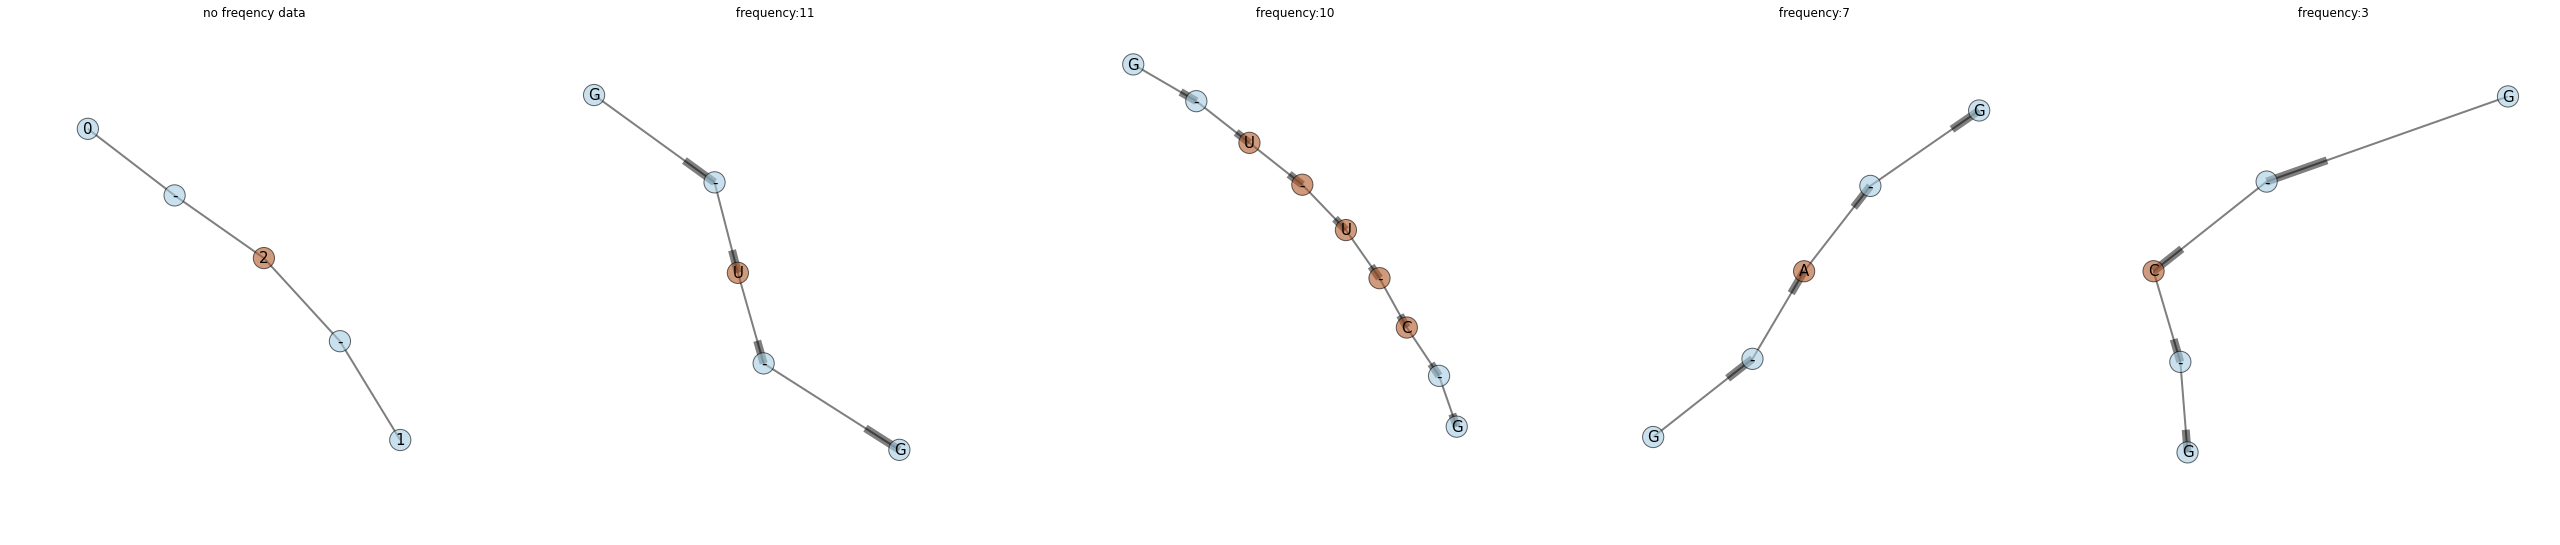

In [26]:
#draw production rules
draw.draw_grammar(sampler.lsgg.productions,n_productions=5,n_graphs_per_production=5,
                     n_graphs_per_line=5, size=9, contract=False,
                     colormap='Paired', invert_colormap=False,node_border=1,
                     vertex_alpha=0.6, edge_alpha=0.5, node_size=450, abstract_interface=True)


preprocessing grammar
_sample_notes: None
accept_static_penalty: 0.0
batch_size: 1
    burnin: 0
estimatorobject: <graphlearn.estimator.Wrapper instance at 0x7f01e09fc7a0>
feasibility_checker: <graphlearn.feasibility.FeasibilityChecker instance at 0x7f01d3d3ea28>
generator_mode: False
hash_bitmask: 1048575
improving_linear_start: 0
improving_penalty_per_step: 0.0666666666667
improving_threshold: 15
keep_duplicates: True
      lsgg: <graphlearn.localsubstitutablegraphgrammar.LocalSubstitutableGraphGrammar object at 0x7f01e0289490>
max_core_size_diff: -2
maxbacktrack: 0
   monitor: True
  monitors: []
    n_jobs: 1
   n_steps: 30
      nbit: 20
node_entity_check: <function <lambda> at 0x7f01e0638848>
 omit_seed: False
postprocessor: <graphlearn.processing.PostProcessor object at 0x7f01e023c790>
preprocessor: <graphlearn.abstract_graphs.learned_RNA.RnaPreProcessor object at 0x7f01e051efd0>
probabilistic_core_choice: False
proposal_probability: False
quick_skip_orig_cip: False
radius_list:

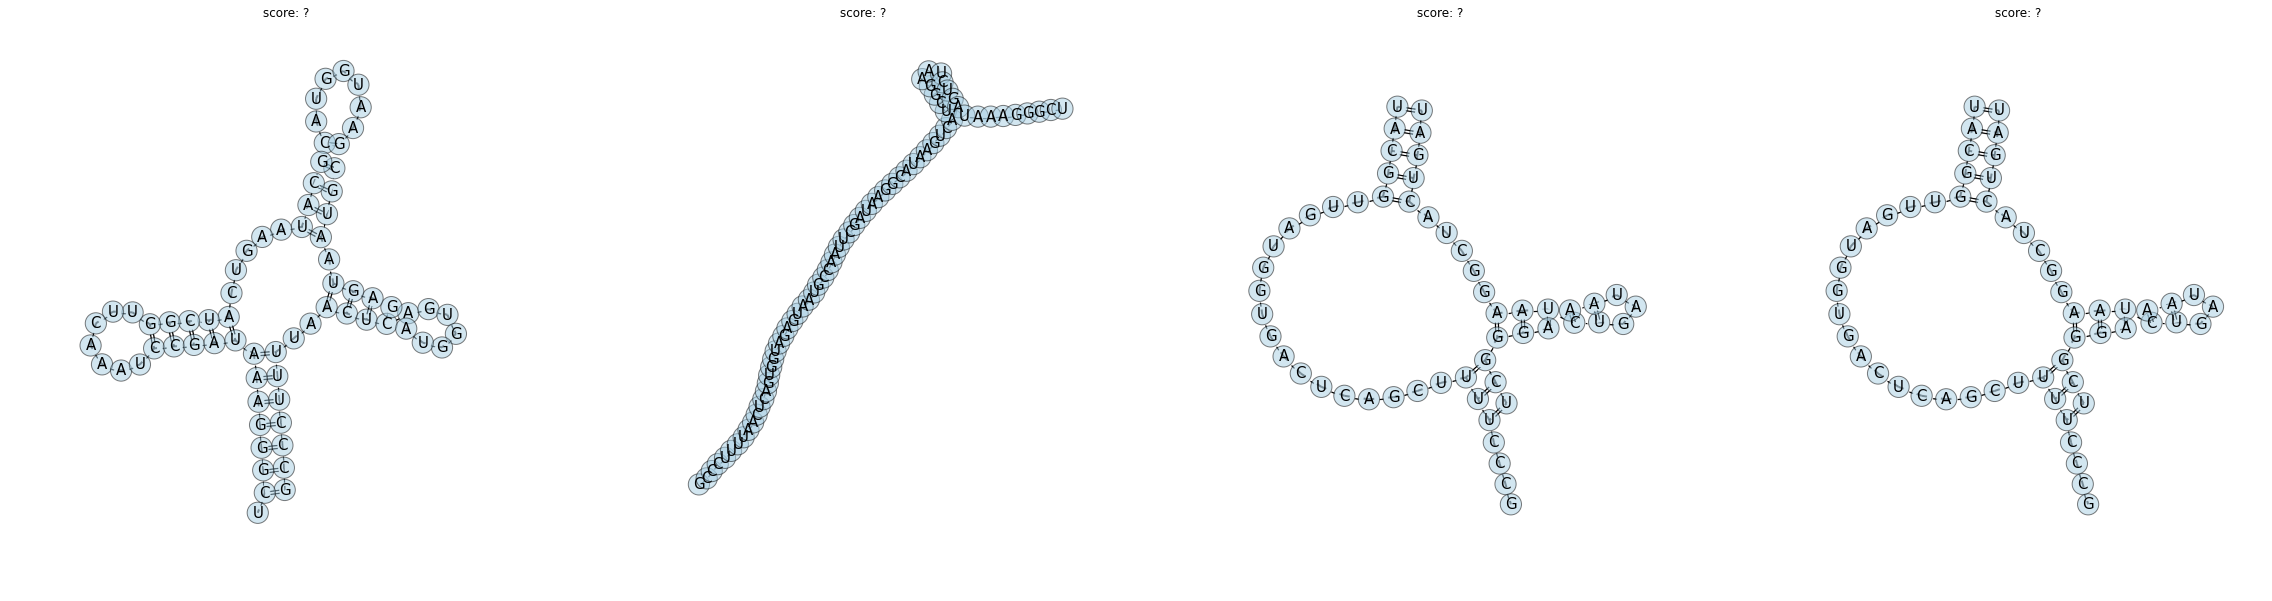

_propose_graph: iteration 0 ; core 0 of 5 ; original_cips tried  0 ; size 164
_propose_graph: iteration 1 ; core 0 of 2 ; original_cips tried  0 ; size 152
_propose_graph: iteration 2 ; core 0 of 3 ; original_cips tried  0 ; size 152
_propose_graph: iteration 3 ; core 0 of 10 ; original_cips tried  0 ; size 158
_propose_graph: iteration 4 ; core 0 of 2 ; original_cips tried  0 ; size 152
_propose_graph: iteration 5 ; core 0 of 2 ; original_cips tried  0 ; size 152
_propose_graph: iteration 6 ; core 0 of 3 ; original_cips tried  0 ; size 152
_propose_graph: iteration 7 ; core 0 of 2 ; original_cips tried  0 ; size 159
_propose_graph: iteration 8 ; core 0 of 3 ; original_cips tried  0 ; size 159
_propose_graph: iteration 9 ; core 0 of 8 ; original_cips tried  0 ; size 162
_propose_graph: iteration 10 ; core 0 of 7 ; original_cips tried  0 ; size 157
_propose_graph: iteration 11 ; core 0 of 7 ; original_cips tried  0 ; size 157
_propose_graph: iteration 12 ; core 0 of 7 ; original_cips tr

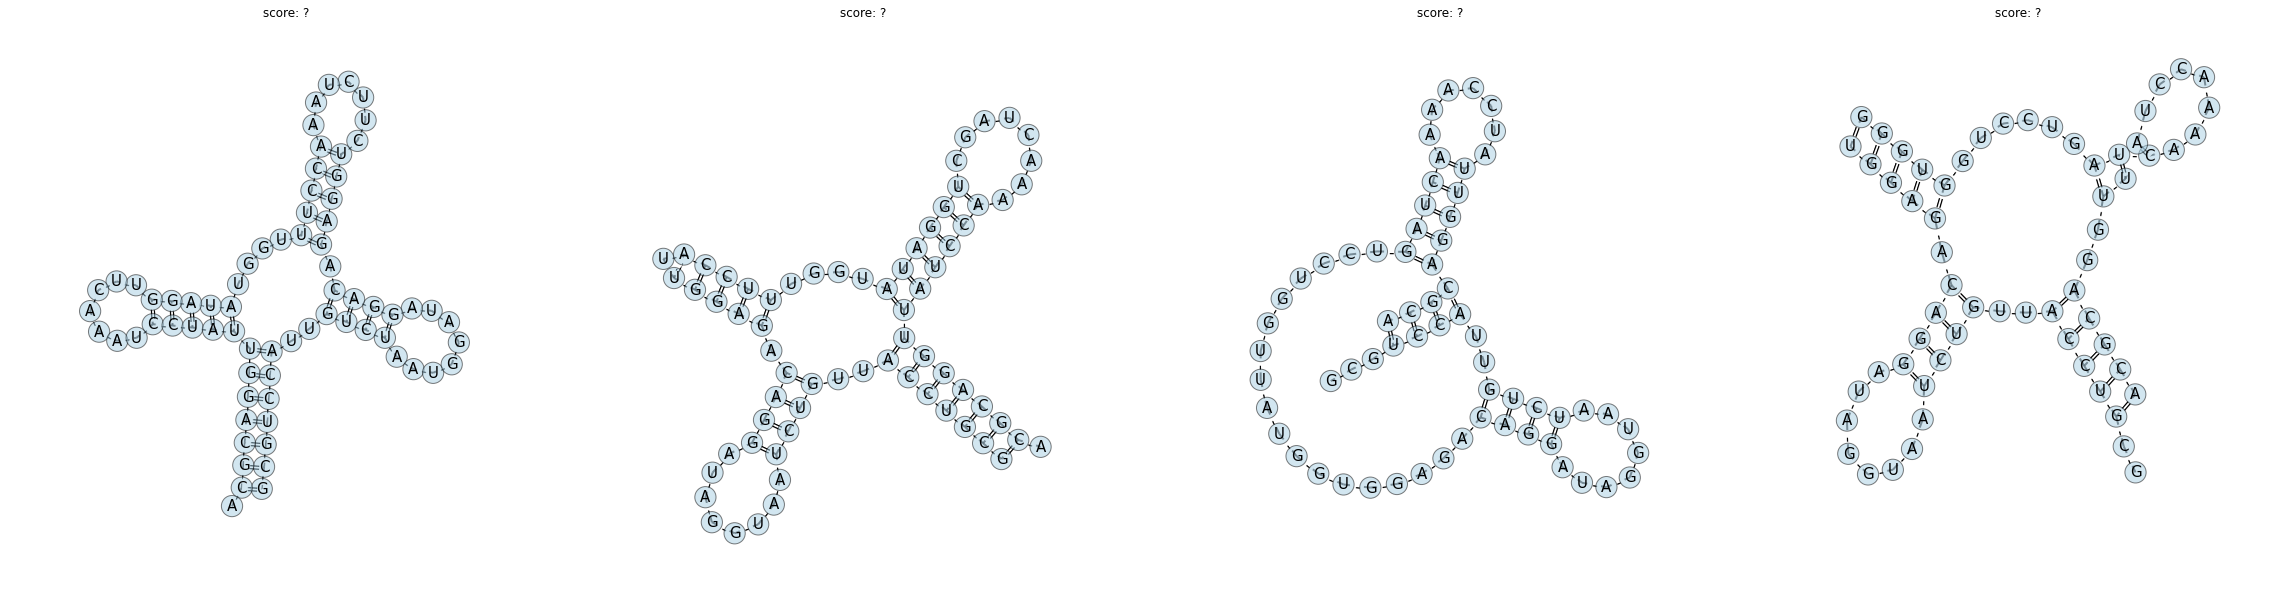

_propose_graph: iteration 0 ; core 0 of 1 ; original_cips tried  0 ; size 166
_propose_graph: iteration 1 ; core 0 of 1 ; original_cips tried  0 ; size 169
_propose_graph: iteration 2 ; core 0 of 1 ; original_cips tried  0 ; size 166
_propose_graph: iteration 3 ; core 1 of 9 ; original_cips tried  0 ; size 166
_propose_graph: iteration 4 ; core 0 of 5 ; original_cips tried  0 ; size 166
_propose_graph: iteration 5 ; core 0 of 3 ; original_cips tried  0 ; size 166
_propose_graph: iteration 6 ; core 0 of 6 ; original_cips tried  0 ; size 166
_propose_graph: iteration 7 ; core 0 of 9 ; original_cips tried  0 ; size 161
_propose_graph: iteration 8 ; core 0 of 6 ; original_cips tried  0 ; size 161
_propose_graph: iteration 9 ; core 0 of 3 ; original_cips tried  0 ; size 161
_propose_graph: iteration 10 ; core 0 of 1 ; original_cips tried  0 ; size 165
_propose_graph: iteration 11 ; core 5 of 6 ; original_cips tried  0 ; size 161
_propose_graph: iteration 12 ; core 0 of 7 ; original_cips tri

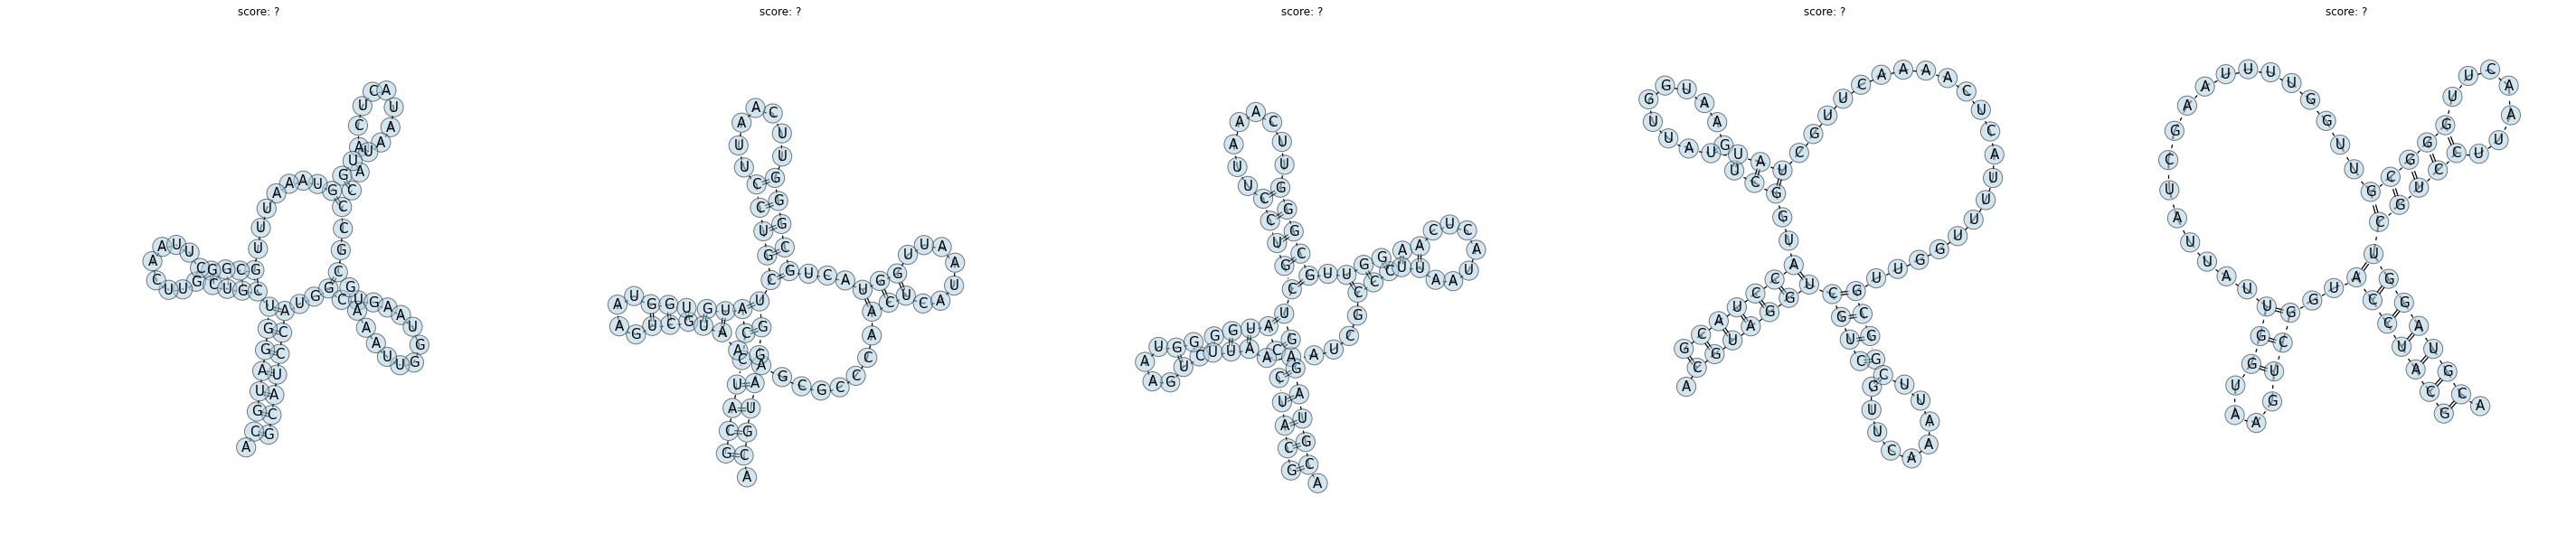

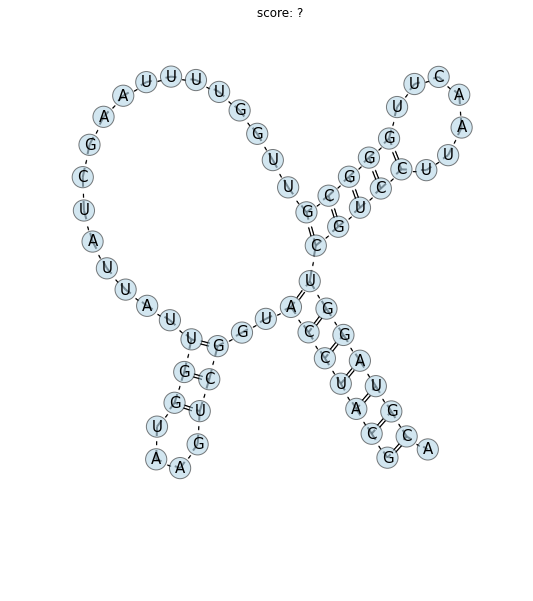

_propose_graph: iteration 0 ; core 0 of 7 ; original_cips tried  0 ; size 176
_propose_graph: iteration 1 ; core 0 of 10 ; original_cips tried  0 ; size 174
_propose_graph: iteration 2 ; core 0 of 5 ; original_cips tried  0 ; size 168
_propose_graph: iteration 3 ; core 0 of 7 ; original_cips tried  0 ; size 172
_propose_graph: iteration 4 ; core 0 of 1 ; original_cips tried  0 ; size 168
_propose_graph: iteration 5 ; core 0 of 10 ; original_cips tried  0 ; size 149
_propose_graph: iteration 6 ; core 0 of 3 ; original_cips tried  1 ; size 148
_propose_graph: iteration 7 ; core 0 of 2 ; original_cips tried  0 ; size 148
select_cip_for_substitution failed because no suiting interface was found,             extract failed 36 times; cip found but unacceptable:36 
propose failed.. usualy the problem is propose_single_cip
Traceback (most recent call last):
  File "/home/ikea/GraphLearn/graphlearn/graphlearn.py", line 413, in _sample
    candidate_graph_manager = self._propose(graph_manager)
 

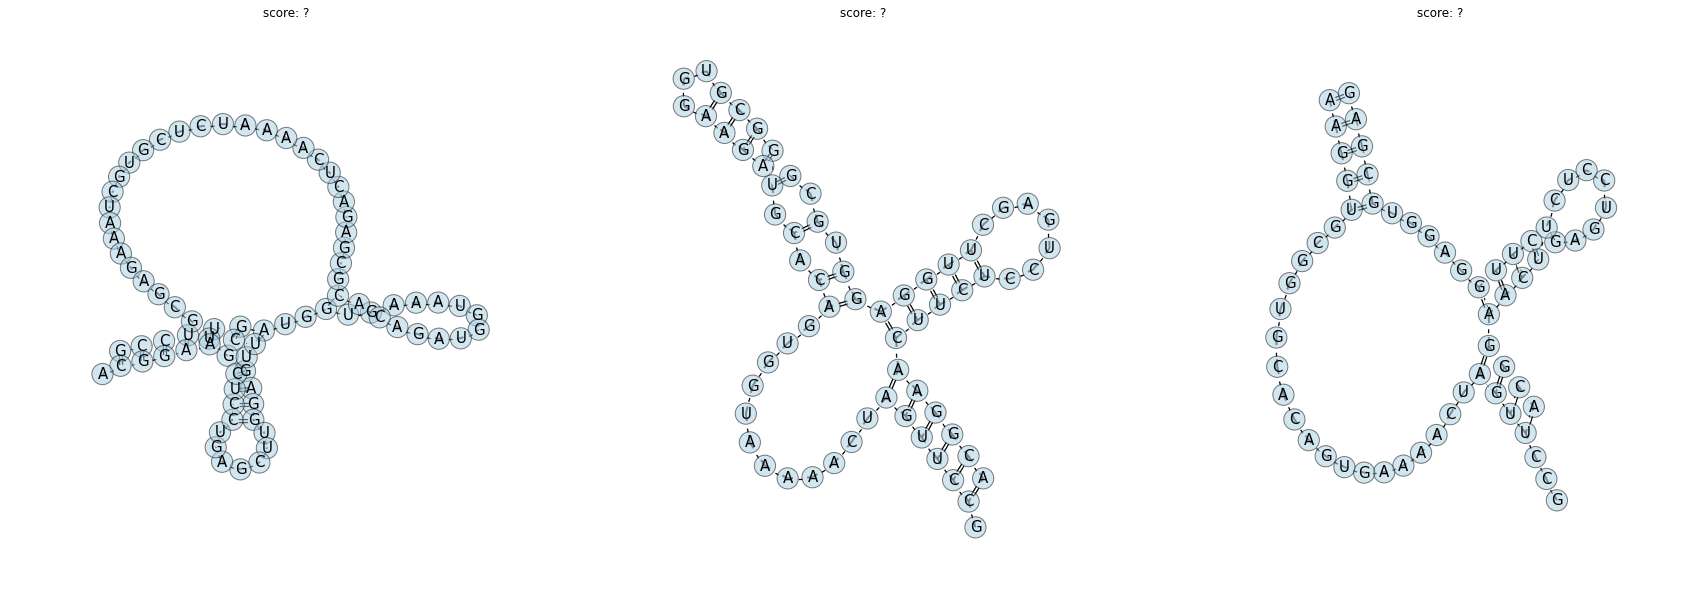

_propose_graph: iteration 0 ; core 0 of 1 ; original_cips tried  0 ; size 158
_propose_graph: iteration 1 ; core 0 of 3 ; original_cips tried  0 ; size 154
_propose_graph: iteration 2 ; core 0 of 1 ; original_cips tried  0 ; size 154
_propose_graph: iteration 3 ; core 0 of 2 ; original_cips tried  0 ; size 154
_propose_graph: iteration 4 ; core 0 of 1 ; original_cips tried  0 ; size 156
_propose_graph: iteration 5 ; core 0 of 3 ; original_cips tried  0 ; size 166
_propose_graph: iteration 6 ; core 0 of 3 ; original_cips tried  0 ; size 165
_propose_graph: iteration 7 ; core 1 of 6 ; original_cips tried  0 ; size 165
_propose_graph: iteration 8 ; core 0 of 5 ; original_cips tried  0 ; size 158
_propose_graph: iteration 9 ; core 0 of 7 ; original_cips tried  0 ; size 156
_propose_graph: iteration 10 ; core 0 of 2 ; original_cips tried  1 ; size 162
_propose_graph: iteration 11 ; core 0 of 2 ; original_cips tried  0 ; size 162
_propose_graph: iteration 12 ; core 0 of 2 ; original_cips tri

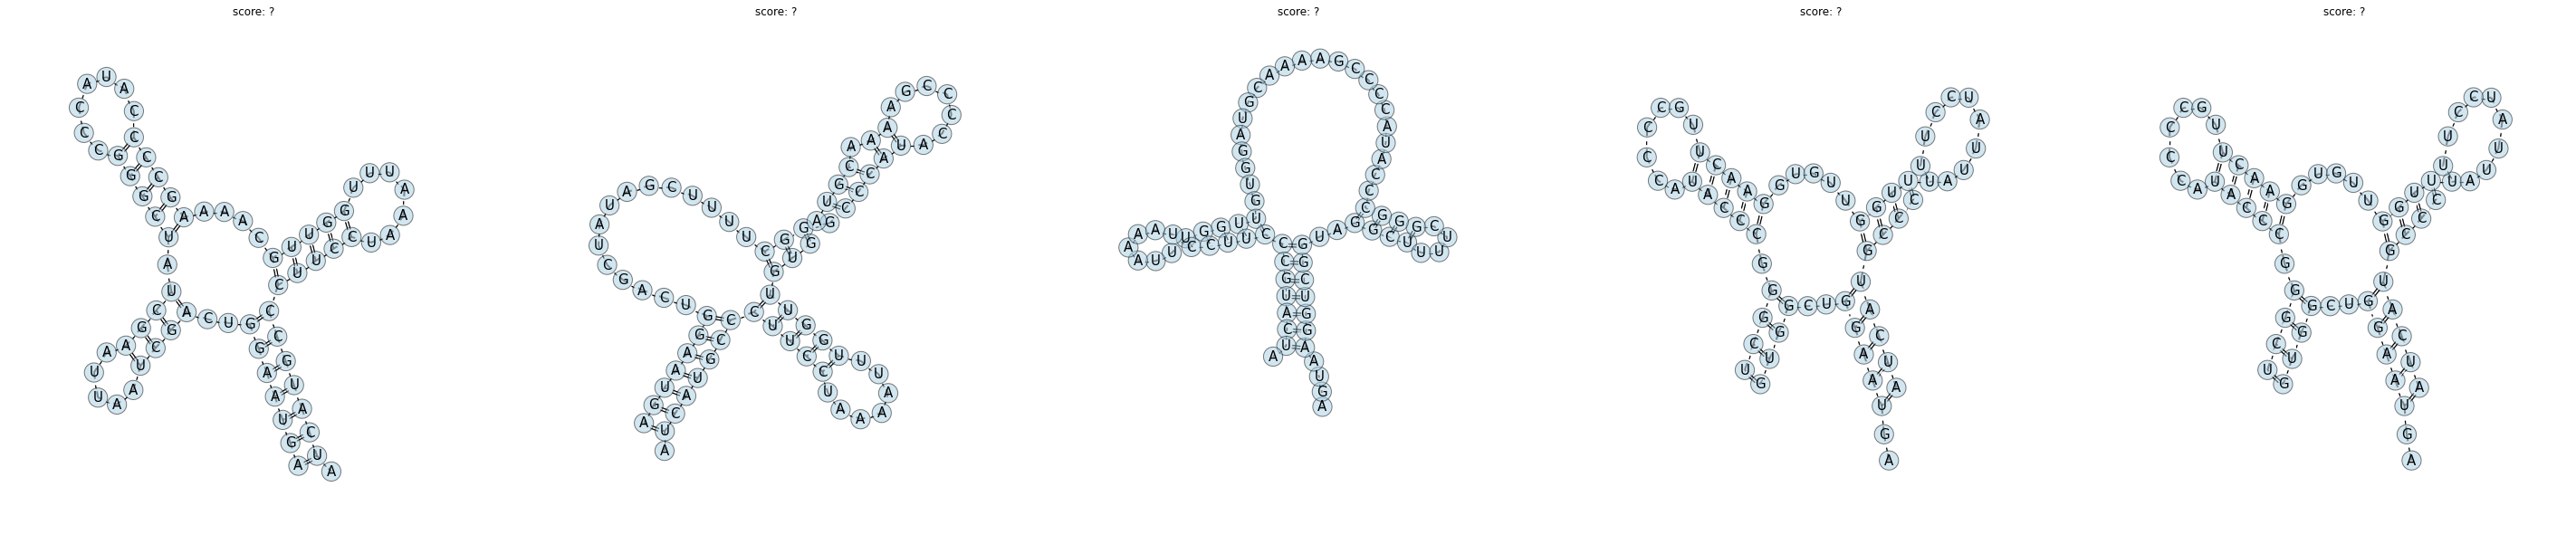

_propose_graph: iteration 0 ; core 0 of 3 ; original_cips tried  0 ; size 139
_propose_graph: iteration 1 ; core 0 of 7 ; original_cips tried  0 ; size 135
_propose_graph: iteration 2 ; core 0 of 5 ; original_cips tried  0 ; size 143
_propose_graph: iteration 3 ; core 0 of 7 ; original_cips tried  0 ; size 125
_propose_graph: iteration 4 ; core 0 of 6 ; original_cips tried  0 ; size 125
_propose_graph: iteration 5 ; core 0 of 10 ; original_cips tried  0 ; size 125
_propose_graph: iteration 6 ; core 0 of 9 ; original_cips tried  0 ; size 113
_propose_graph: iteration 7 ; core 0 of 2 ; original_cips tried  0 ; size 113
_propose_graph: iteration 8 ; core 0 of 10 ; original_cips tried  1 ; size 107
_propose_graph: iteration 9 ; core 0 of 7 ; original_cips tried  0 ; size 112
_propose_graph: iteration 10 ; core 0 of 6 ; original_cips tried  0 ; size 105
_propose_graph: iteration 11 ; core 0 of 3 ; original_cips tried  1 ; size 105
_propose_graph: iteration 12 ; core 0 of 3 ; original_cips t

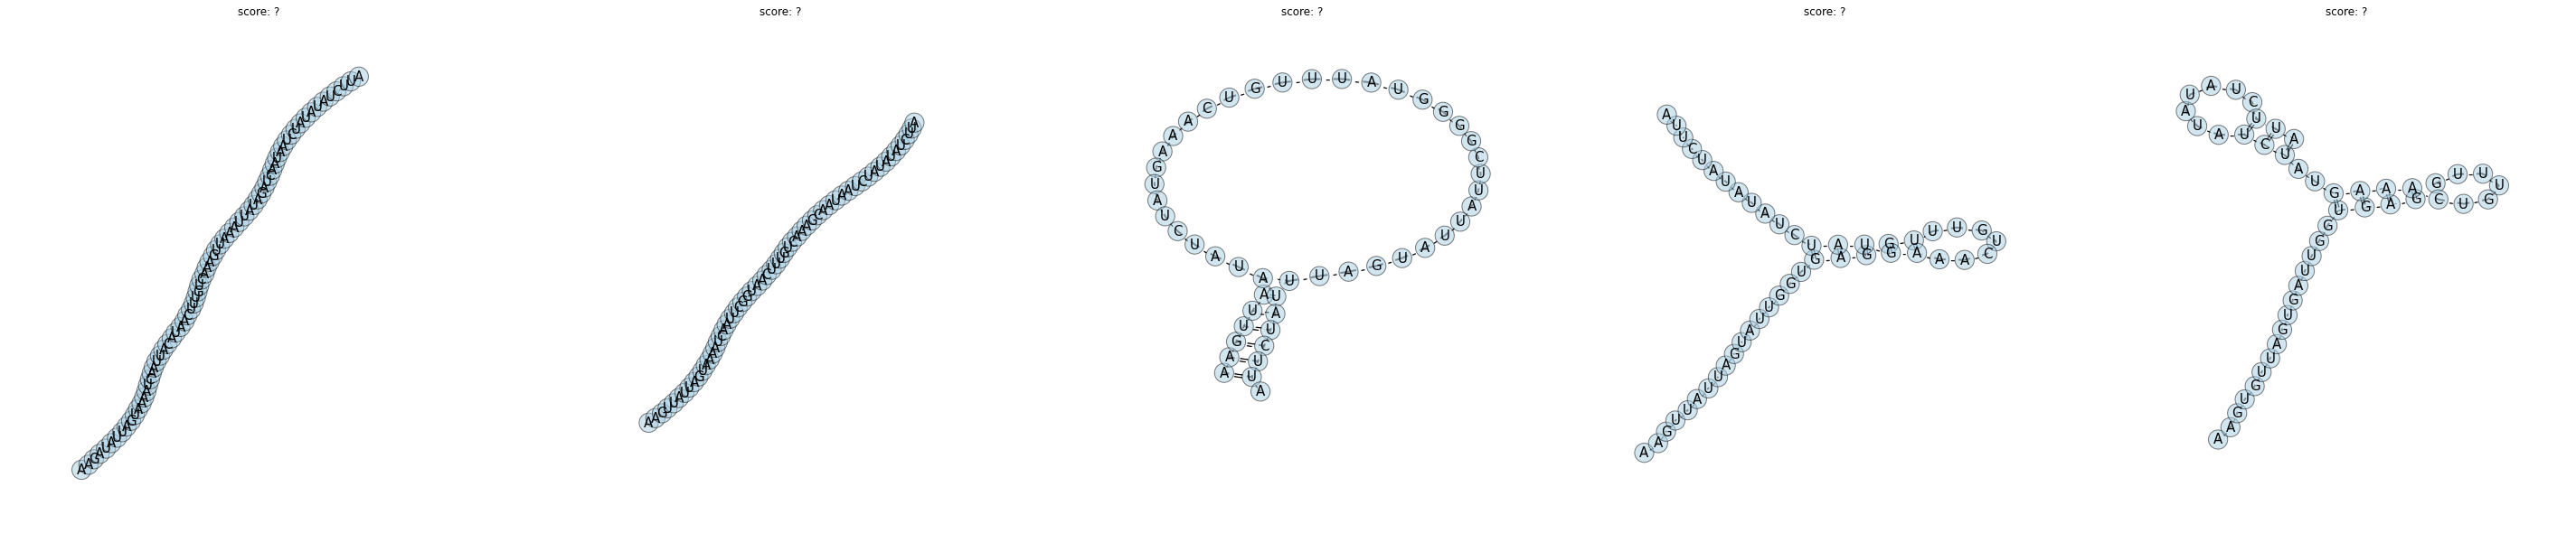

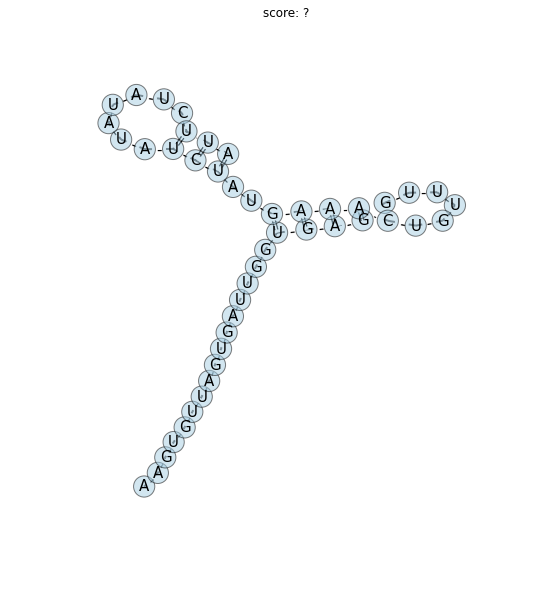

_propose_graph: iteration 0 ; core 0 of 2 ; original_cips tried  0 ; size 154
select_cip_for_substitution failed because no suiting interface was found,             extract failed 32 times; cip found but unacceptable:32 
propose failed.. usualy the problem is propose_single_cip
Traceback (most recent call last):
  File "/home/ikea/GraphLearn/graphlearn/graphlearn.py", line 413, in _sample
    candidate_graph_manager = self._propose(graph_manager)
  File "/home/ikea/GraphLearn/graphlearn/graphlearn.py", line 617, in _propose
    raise Exception("propose failed.. usualy the problem is propose_single_cip")
Exception: propose failed.. usualy the problem is propose_single_cip

_sample stopped at 1 out of 30 n_steps
Graph id: 21


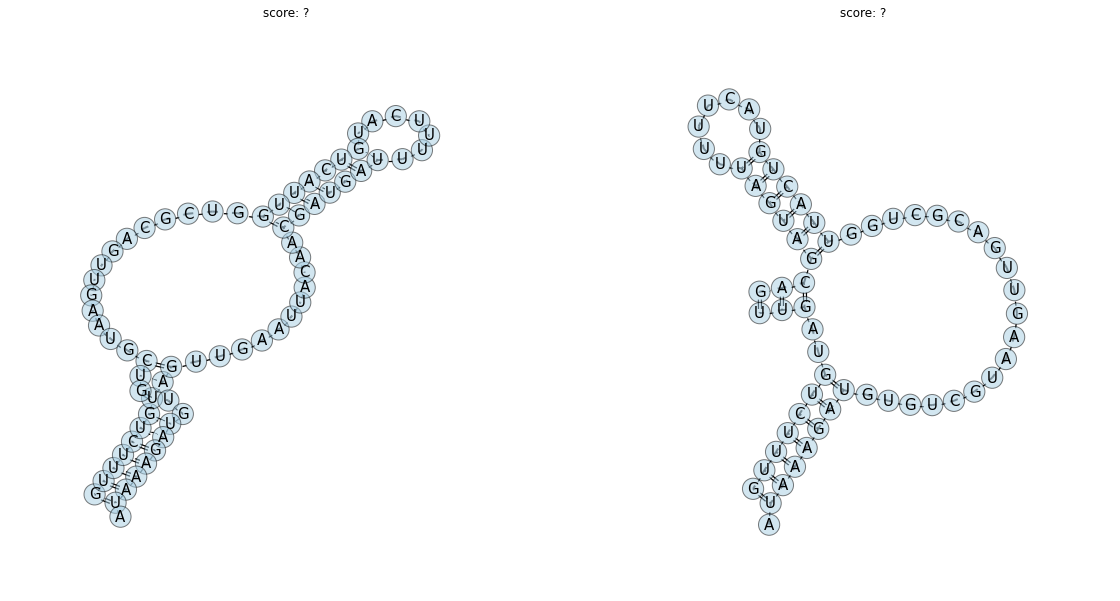

_propose_graph: iteration 0 ; core 9 of 9 ; original_cips tried  0 ; size 148
_propose_graph: iteration 1 ; core 0 of 6 ; original_cips tried  0 ; size 132
_propose_graph: iteration 2 ; core 0 of 10 ; original_cips tried  0 ; size 148
_propose_graph: iteration 3 ; core 0 of 1 ; original_cips tried  0 ; size 131
_propose_graph: iteration 4 ; core 0 of 2 ; original_cips tried  0 ; size 131
_propose_graph: iteration 5 ; core 0 of 2 ; original_cips tried  0 ; size 134
_propose_graph: iteration 6 ; core 0 of 3 ; original_cips tried  0 ; size 133
_propose_graph: iteration 7 ; core 1 of 3 ; original_cips tried  0 ; size 125
_propose_graph: iteration 8 ; core 0 of 3 ; original_cips tried  0 ; size 133
_propose_graph: iteration 9 ; core 0 of 3 ; original_cips tried  0 ; size 133
_propose_graph: iteration 10 ; core 0 of 1 ; original_cips tried  0 ; size 133
_propose_graph: iteration 11 ; core 0 of 3 ; original_cips tried  0 ; size 123
_propose_graph: iteration 12 ; core 0 of 2 ; original_cips tr

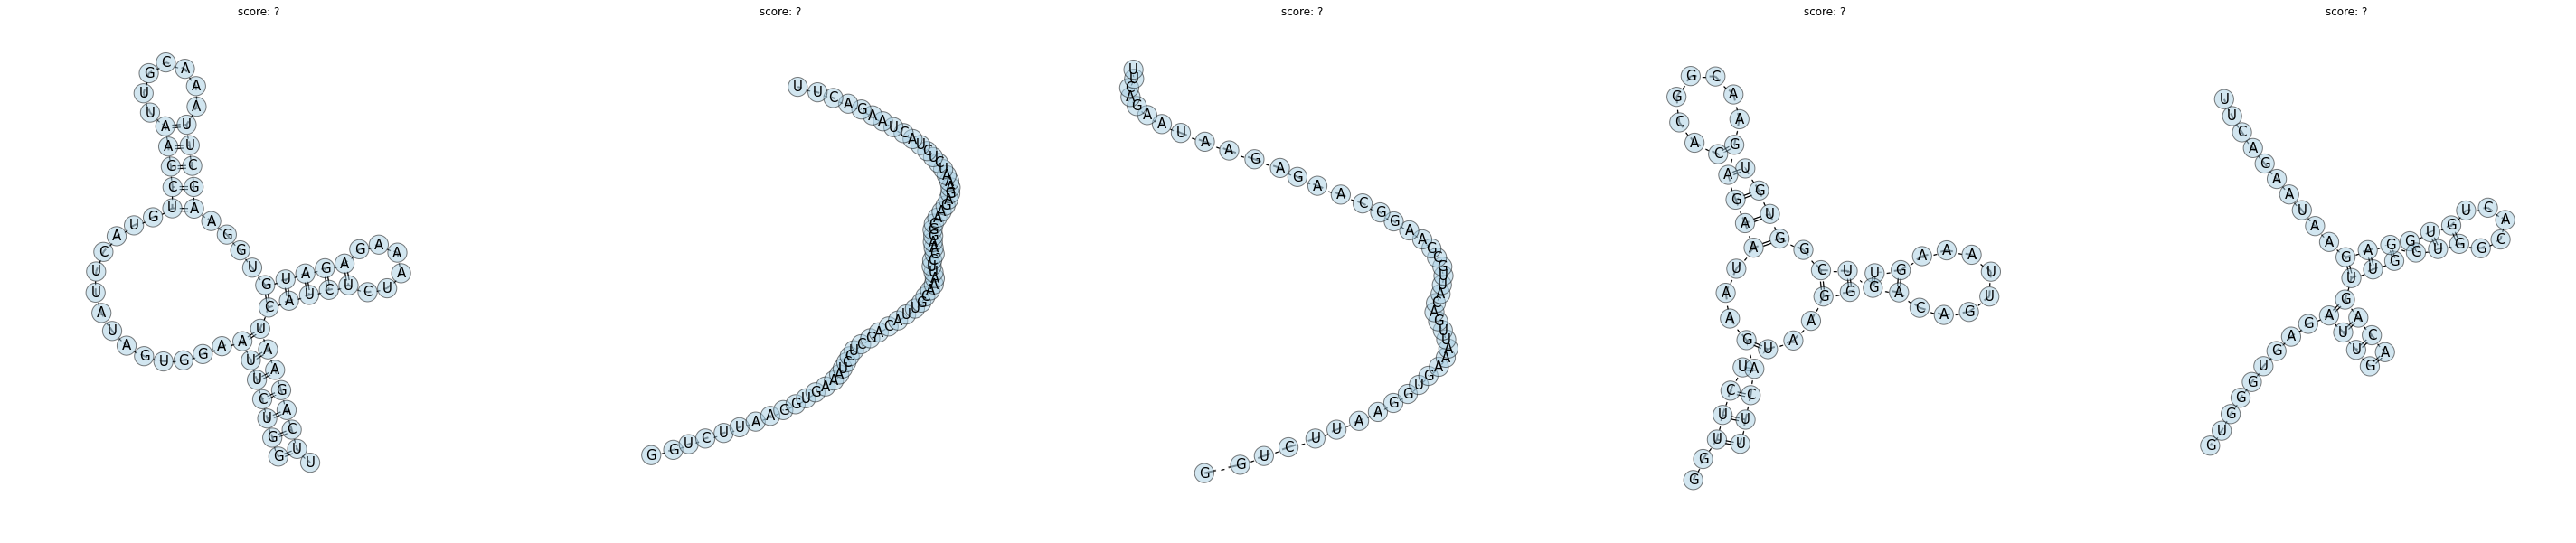

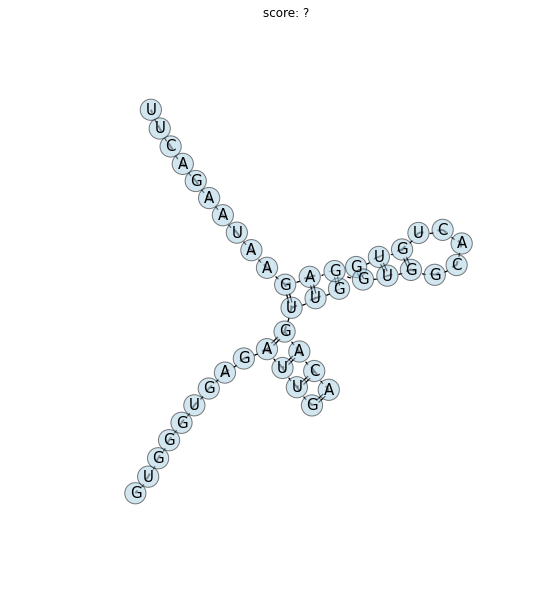

_propose_graph: iteration 0 ; core 0 of 7 ; original_cips tried  0 ; size 139
_propose_graph: iteration 1 ; core 0 of 9 ; original_cips tried  0 ; size 133
_propose_graph: iteration 2 ; core 0 of 7 ; original_cips tried  0 ; size 136
_propose_graph: iteration 3 ; core 0 of 2 ; original_cips tried  0 ; size 150
_propose_graph: iteration 4 ; core 0 of 3 ; original_cips tried  0 ; size 133
_propose_graph: iteration 5 ; core 0 of 7 ; original_cips tried  0 ; size 125
_propose_graph: iteration 6 ; core 0 of 6 ; original_cips tried  0 ; size 123
_propose_graph: iteration 7 ; core 0 of 7 ; original_cips tried  0 ; size 127
_propose_graph: iteration 8 ; core 0 of 2 ; original_cips tried  1 ; size 126
_propose_graph: iteration 9 ; core 0 of 3 ; original_cips tried  0 ; size 126
_propose_graph: iteration 10 ; core 0 of 3 ; original_cips tried  1 ; size 126
_propose_graph: iteration 11 ; core 0 of 2 ; original_cips tried  1 ; size 126
_propose_graph: iteration 12 ; core 0 of 1 ; original_cips tri

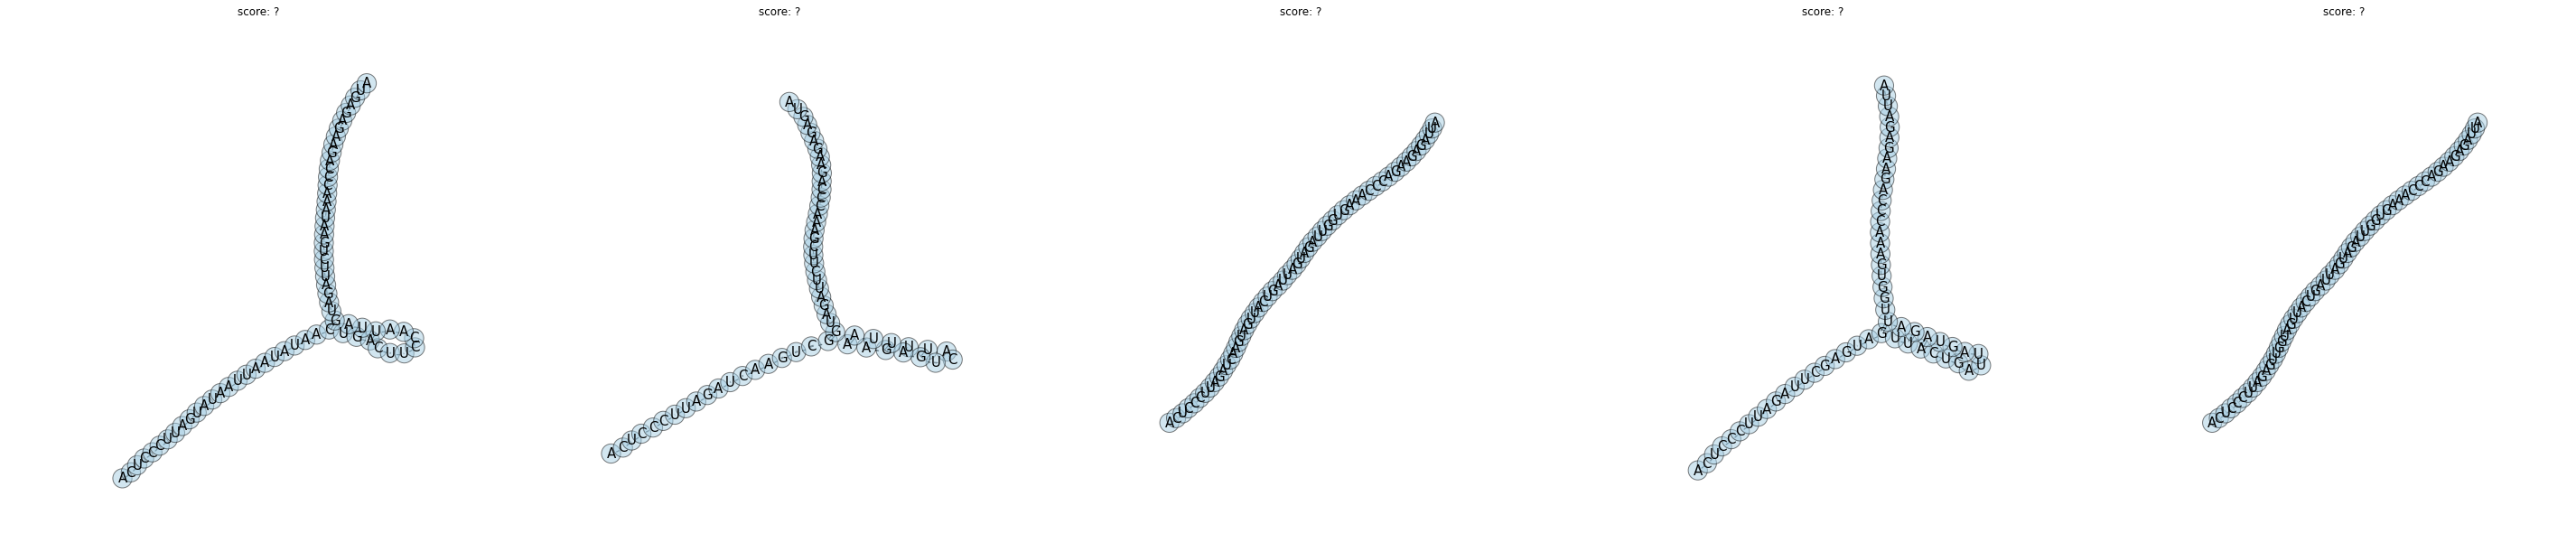

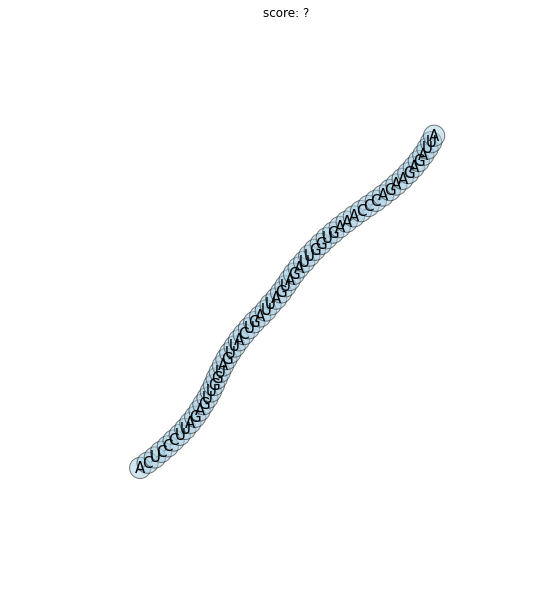

CPU times: user 1min 19s, sys: 12 s, total: 1min 31s
Wall time: 1min 43s


In [27]:
%%time

import os
os.nice(19)
import graphlearn.utils.draw as draw
import itertools

graphs = get_sequences()

id_start=15
id_end=id_start+9
graphs = itertools.islice(graphs,id_start,id_end)
n_steps=30

graphs = sampler.sample(graphs,
                        n_samples=5,
                        batch_size=1,
                        n_steps=n_steps,
                        n_jobs=1,
                        quick_skip_orig_cip=False,
                        probabilistic_core_choice=False,
                        burnin=0,
                        improving_threshold=0.5,
                        max_size_diff=-1,
                        select_cip_max_tries=50,
                        keep_duplicates=True,
                        omit_seed=False,
                        monitor=True)


scores=[]
sequences=[]
ids=range(id_start,id_end)
for i,graph in enumerate(graphs):
    print 'Graph id: %d'%(ids[i])
    scores.append(sampler.monitors[i].sampling_info['score_history'])
    path_graphs = graph
    sequences.append(sampler.monitors[i].sampling_info['notes'])    

    path_graphs= list(path_graphs)
    draw.graphlearn(path_graphs,
                           n_graphs_per_line=5, size=10, 
                           colormap='Paired', invert_colormap=False,node_border=0.5, vertex_color='color_level',
                           vertex_alpha=0.5, edge_alpha=0.7, node_size=450,edge_label='label',
                          headlinehook= draw.get_score_of_graph
                          )
    

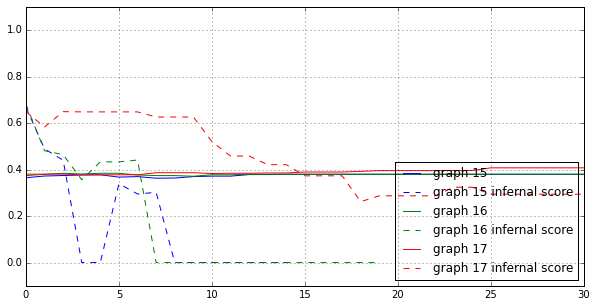

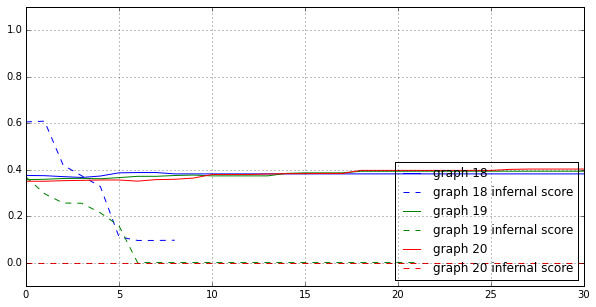

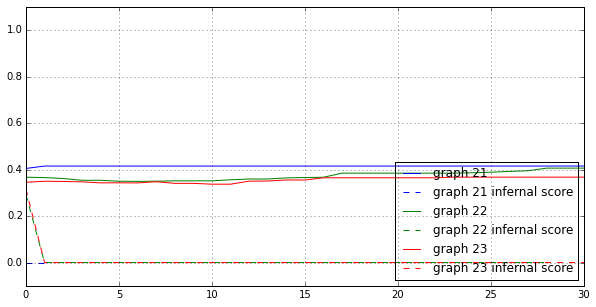

In [29]:
colors=['b','g','r','c','m','y','k','w']

%matplotlib inline
from itertools import islice
import matplotlib.pyplot as plt
import numpy as np
step=1
num_graphs_per_plot=3
num_plots=np.ceil([len(scores)/num_graphs_per_plot])
for i in range(num_plots):
    plt.figure(figsize=(10,5))
    for j,score in enumerate(scores[i*num_graphs_per_plot:i*num_graphs_per_plot+num_graphs_per_plot]):
        data = list(islice(score,None, None, step))
        plt.plot(data,ls='-',color=colors[j], label='graph %d'%(j+i*num_graphs_per_plot+id_start))
        
        # okok now we need to add the infernal evaluation
        seqs=sequences[i*num_graphs_per_plot+j]
        seqs=seqs.split('n')
        
        # SEQUENCES STILL CONTAIN F, ALSO THERE ARE ERRORMESSAGES AT THE END OF INFO
        #seqs=seqs[:-1]
    
        #print seqs
        data2= rna.infernal_checker(seqs,cmfile='../rf00005.cm')
        
        #print data2,seqs
        plt.plot(data2,ls='--',color=colors[j], label='graph %d infernal score'%(j+i*num_graphs_per_plot+id_start))
    
    plt.legend(loc='lower right')
    plt.grid()
    plt.ylim(-0.1,1.1)
    plt.show()

In [ ]:
import graphlearn.abstract_graphs.molecules as mole
from graphlearn.utils import draw
from eden.graph import Vectorizer
v=Vectorizer()
from graphlearn.abstract_graphs.molecules import node_to_cycle
import networkx as nx
import eden

def make_abstract(graph):
    '''
    make sure this is not expanded
    '''
    # prepare fast hash function
    def fhash(stuff):
        return eden.fast_hash(stuff, 2 ** 20 - 1)
    
    
    # all nodes get their cycle calculated
    for n, d in graph.nodes(data=True):
        d['cycle'] = list(node_to_cycle(graph, n))
        d['cycle'].sort()
        #if 'parent'in d:
        #    d.pop('parent')
            

    
    # make sure most of the abstract nodes are created.
    abstract_graph = nx.Graph()
    for n, d in graph.nodes(data=True):
        cyclash = fhash(d['cycle'])
        if cyclash not in abstract_graph.node:
            abstract_graph.add_node(cyclash)
            abstract_graph.node[cyclash]['contracted'] = set(d['cycle'])
            abstract_graph.node[cyclash]['node'] = True
            # it is possible that a node belongs to more than 1 cycle, so...
            # each node gets parents
            for e in d['cycle']:
                node = graph.node[e]
                if 'parent' not in node:
                    node['parent'] = set()
                node['parent'].add(cyclash)


    
    #  HERE THE ACTUAL ABSTRACTION BEGINS

    # connect nodes in the abstract graph
    get_element = lambda x: list(x)[0]


    
    # FOR ALL ABSTRACT NODES
    for n, d in abstract_graph.nodes(data=True):
        # FIND A LABEL
        if len(d['contracted']) > 1:
            labels = [ord(graph.node[childid]['label']) for childid in d['contracted']]
            labels.sort()
            d['label'] = "cycle" #fhash(labels)

        else:
            d['label'] = graph.node[get_element(d['contracted'])]['label']

      
 
        # THEN LOOK AT ALL CONTRACTED NODES TO FIND OUT WHAT CONNECTION WE HAVE TO OUR NEIGHBORS
        for base_node in d['contracted']:
            base_neighbors = graph.neighbors(base_node)
            # for all the neighbors
            for neigh in base_neighbors:
                
                
                # find out if we have to build a connector node
                if len(graph.node[neigh]['cycle']) > 1 and len(d['contracted']) > 1:

                    for other in graph.node[neigh]['parent']:
                        if other != n:
                            l = [other, n]
                            l.sort()
                            connector = fhash(l)
                            
                            
                            shared_nodes = abstract_graph.node[other]['contracted'] & d['contracted']
                            if len(shared_nodes)==0:
                                label='e'
                            else:
                                labels = [ord(graph.node[sid]['label']) for sid in shared_nodes]
                                labels.sort()
                                share_hash = fhash(labels)
                                label='share:'+str(share_hash)
                            abstract_graph.add_edge(other,n,label=label)
                            '''
                            if connector not in abstract_graph.node:
                                # we need to consider making the edge the actual intersect of the two...

                                abstract_graph.add_node(connector)
                                abstract_graph.node[connector]['edge'] = True

                                # abstract_graph.node[connector]['label']='edge'
                                shared_nodes = abstract_graph.node[other]['contracted'] & d['contracted']
                                labels = [ord(graph.node[sid]['label']) for sid in shared_nodes]
                                labels.sort()
                                share_hash = fhash(labels)


                                abstract_graph.node[connector]['label'] = "shared" + str(share_hash)

                                abstract_graph.add_edge(other, connector)
                                abstract_graph.add_edge(connector, n)
                            '''
                else:
                    for e in graph.node[neigh]['parent']:
                        abstract_graph.add_edge(n, e, label='e')
    return abstract_graph




def graphor(base,abstr,nested=True):
    g= nx.disjoint_union(base, abstr)
    node_id= len(g)

    for n,d in g.nodes(data=True):
        if 'contracted' in d and 'edge' not in d:
            for e in d['contracted']:
                if 'edge' not in g.node[e]:
                    # we want an edge from n to e
                    g.add_node(node_id,edge=True,label='e')
                    g.add_edge( n, node_id, nesting=True)
                    g.add_edge( node_id, e, nesting=True)
                    #g.add_edge( n, e, nesting=True)
                    node_id+=1
    return g
    


gr=get_graphs()
for i in range(1):
    g=gr.next()
    ab=make_abstract(g)
    
    g=v._edge_to_vertex_transform(g)
    ab=v._edge_to_vertex_transform(ab)
    zz=graphor(g,ab)
    draw.graphlearn([g,ab], size=20)
    v.transform_single(zz)

    


In [ ]:
import itertools
l=[1,2,3]
for e in itertools.islice(l,6):
    print e


In [ ]:
import subprocess as sp
def call_folder(filename='NNTMP'):
   
    out = sp.check_output('mlocarna %s | grep "HACK%d\|alifold"' % (filename, 4), shell=True)
    out=out.split('\n')
    seq=out[0].split()[1]
    stru=out[1].split()[1]
    stru=list(stru)
    #stru2=''.join(stru)
  

    # find  deletions
    ids=[]
    for i,c in enumerate(seq):
        if c=='-':
            ids.append(i)

    # take care of deletions
    # remove brackets that dont have a partner anymore
    pairdict=_pairs(stru)
    for i in ids:
        if stru[i]!='.':
            stru[pairdict[i]]='.'

    # delete
    ids.reverse()
    for i in ids:
        del stru[i]
        #stru=stru[:i]+stru[i+1:]

    #print seq
    #print stru2
    #print ''.join(stru)

    return ''.join(stru)

call_folder('fold1955')


In [ ]:
s=['GUUGCAUUAGCUCAAUUGGUAGAGCGUUUGUUUUGUAAUCAAAAGGUUUAGAGUUCAACUCUCUAAUGCANUN', 
   'GGAGAGAUGGCCGAGCGGUUCAAGGCGUAGCAUUGGAACUGCUAUGUAGACUUUUGUUUACCGAGGGUUCGAAUCCCUCUCUUUCCG', 
   'AAGAAAUUAGCUCAGUUGGUAGAGCGUUCGUUUUACACACGAAGGUCAGGUGUUCAAAUCACCUAUUUCUUA', 
   'GCCCACUUAGCUCAGAGGUUAGAGCAUCGCAUUUGUAAUGCGAGGGUCAUCGGUUCAAAUCCGAUAGUCGGCU', 
   'GUUGCAUUAGCUCAAUUGGUAGAGCGUUUGUUUUGUAAUCAAAAGGUUUAGAGUUCAACUCUCUAAUGCANUN']

import textwrap
def write_fasta(sequences,filename='asdasd'):
    fasta=''
    for i,s in enumerate(sequences):
        if len(s) > 5:
            seq=s.replace("F","")
            if not rna.is_sequence(seq):
                print 'fail:'+seq
                continue
            seq='\n'.join(textwrap.wrap(seq, width=60))
            fasta+='>HACK%d\n%s\n\n' % (i,seq)
    print fasta
    #with open(filename, 'w') as f:
    #    f.write(fasta)

write_fasta(s,'tmp/test001')
